# EDA - Exploratory Data Analysis

Etapa en la que se llevara a cabo un análisis exhaustivo de los datos. Entre los aspectos destacados que se deben abordar en esta etapa se encuentran:

- La busqueda de valores faltantes.
- Tratamiento de valores faltantes.
- Valores atipicos/extremos o outliers.
- Registros duplicados.

##### *Importamos librerias necesarias:*

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import Utilidades as ut

##### *Almacenamos el contenido del archivo en un DataFrame:*

In [19]:
df = pd.read_csv("../Data/application_data.csv")

#### *Visualizamos las primeras filas del DataFrame para conocer su estructura:*

In [20]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

##### *Visualizamos el número de filas y columnas:*

In [22]:
df.shape

(307511, 122)

##### *Visualizamos la información general de DataFrame (Cantidad de columnas, nombres de las columnas, tipos de datos).*

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


##### *Analizamos las estadisticas descriptivas de variables numericas del DataFrame:*

In [24]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### *Verificamos valores nulos en el DataFrame:*

In [25]:
df.isnull().sum() 

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

#### *Analizamos el porcentaje de valores nulos por columna:*

In [54]:
ut.porcentaje_valores_nulos(df)

La columna SK_ID_CURR tiene un  0.00 % de valores nulos
La columna TARGET tiene un  0.00 % de valores nulos
La columna NAME_CONTRACT_TYPE tiene un  0.00 % de valores nulos
La columna CODE_GENDER tiene un  0.00 % de valores nulos
La columna FLAG_OWN_CAR tiene un  0.00 % de valores nulos
La columna FLAG_OWN_REALTY tiene un  0.00 % de valores nulos
La columna CNT_CHILDREN tiene un  0.00 % de valores nulos
La columna AMT_INCOME_TOTAL tiene un  0.00 % de valores nulos
La columna AMT_CREDIT tiene un  0.00 % de valores nulos
La columna AMT_ANNUITY tiene un  0.00 % de valores nulos
La columna AMT_GOODS_PRICE tiene un  0.09 % de valores nulos
La columna NAME_TYPE_SUITE tiene un  0.42 % de valores nulos
La columna NAME_INCOME_TYPE tiene un  0.00 % de valores nulos
La columna NAME_EDUCATION_TYPE tiene un  0.00 % de valores nulos
La columna NAME_FAMILY_STATUS tiene un  0.00 % de valores nulos
La columna NAME_HOUSING_TYPE tiene un  0.00 % de valores nulos
La columna REGION_POPULATION_RELATIVE tiene

> *Consideramos que aquellas columnas con porcentaje mayor a 40%, deberan ser eliminadas posteriormente en el proceso de ETL (Desde la columna EXT_SOURCE_1 en adelante).*

##### *Verificamos registros duplicados en el DataFrame:*

In [28]:
df[df.duplicated(keep=False)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


> *No se encontraron registros duplicados en el mismo.*

##### *Analizamos cantidad de valores unicos por columna:*

In [29]:
df.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

#### *Analizamos la ocurrencia de variables categoricas dentro de las columnas:*

In [30]:
df['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

> *Cliente con dificultad de pago (demoras): Siendo 1 = Cliente **con** dificultad de pago, 0 = Cliente **sin** dificultad de pago.*

In [31]:
df['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

> *Cash loans = Pago en efectivo, Revolving loans = Tarjeta de credito*

In [32]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

> *F = Femenino, M = Masculino*

In [33]:
df['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

> *N = No tiene auto, Y = Si tiene auto.*

In [34]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

> *Hace referencia al estado civil de la persona.*

In [35]:
df['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

> *Hace referencia a la cantidad de hijos.*

In [36]:
df['AMT_INCOME_TOTAL'].value_counts()

AMT_INCOME_TOTAL
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: count, Length: 2548, dtype: int64

> *Hace referencia al ingreso de la persona.*

In [37]:
df['AMT_CREDIT'].value_counts()

AMT_CREDIT
450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
487318.5        1
630400.5        1
1875276.0       1
1395895.5       1
1391130.0       1
Name: count, Length: 5603, dtype: int64

> *Hace referencia al monto del credito del prestamo.*

In [39]:
df['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

> *Hace referencia a la ocupación y los ingresos de la persona.*

In [40]:
df['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

> *Hace referencia al nivel de estudios de la persona.*

In [41]:
df['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

> *Hace referencia al tipo de vivienda de la persona.*

In [43]:
df['DAYS_BIRTH'].value_counts()

DAYS_BIRTH
-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-24898     1
-24868     1
-8017      1
-25098     1
-25061     1
Name: count, Length: 17460, dtype: int64

> *Hace referencia a la edad del cliente en días de nacido.*

In [44]:
df['FLAG_MOBIL'].value_counts()

FLAG_MOBIL
1    307510
0         1
Name: count, dtype: int64

> *Hace referencia a si el cliente proporciono un telefono celular o no. 1 = Si, 0 = No.*

In [45]:
df['FLAG_EMAIL'].value_counts()

FLAG_EMAIL
0    290069
1     17442
Name: count, dtype: int64

> *Hace referencia a si el ciente proporciono email. 1 = Si, 0 = No.*

In [46]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

> *Hace referencia a la profesión de la persona.*

In [47]:
df['CNT_FAM_MEMBERS'].value_counts()

CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

> *Hace referencia a la cantidad de miembros que conforman la familia del cliente.*

In [49]:
df['WEEKDAY_APPR_PROCESS_START'].value_counts()

WEEKDAY_APPR_PROCESS_START
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: count, dtype: int64

> *Hace referencia al día de la semana en el que fue solicitado el prestamo.*

In [50]:
df['HOUR_APPR_PROCESS_START'].value_counts()

HOUR_APPR_PROCESS_START
10    37722
11    37229
12    34233
13    30959
14    27682
9     27384
15    24839
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: count, dtype: int64

> *Hace referencia a la hora en la que fue solicitado el prestamo.*

In [51]:
df['REG_REGION_NOT_LIVE_REGION'].value_counts()

REG_REGION_NOT_LIVE_REGION
0    302854
1      4657
Name: count, dtype: int64

> *Hace referencia a si la dirección donde vive, coincide o no coincide con la dirección de contacto proporcionada.*

In [52]:
df['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

> *Hace referencia al tipo de organización a la que trabaja el cliente.*

#### *Analizamos la cantidad de clientes por estado civil:*

In [77]:
type_counts = df['NAME_FAMILY_STATUS'].value_counts().head(5)

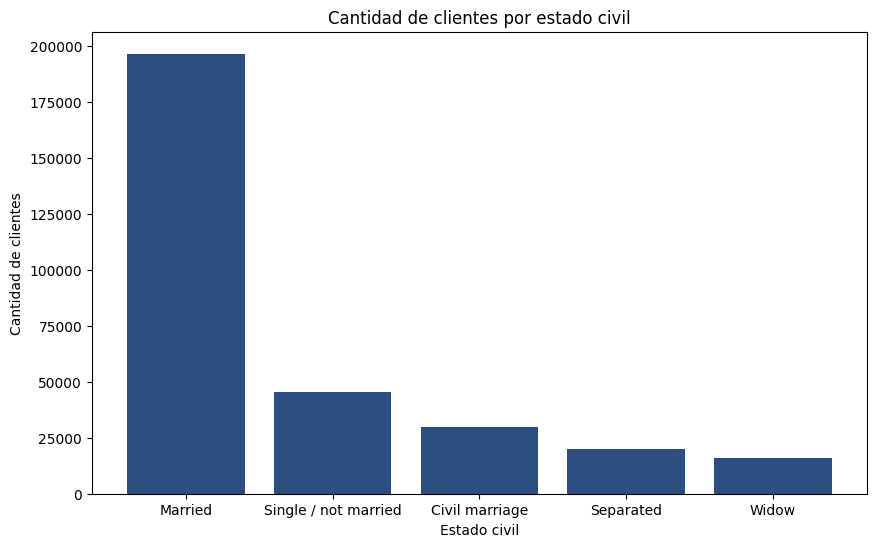

In [78]:
plt.figure(figsize=(10, 6)) 

plt.bar(type_counts.index, type_counts, color='#2C4E80') 

plt.title('Cantidad de clientes por estado civil') 

plt.xlabel('Estado civil') 

plt.ylabel('Cantidad de clientes') 

plt.show() 

> *Podemos ver que el tipo de transaccion con mayor cantidad de transacciones realizadas, es CASH_OUT. Y el tipo con menor cantidad de transacciones es DEBIT.*

#### *Analizamos porcentaje de clientes por género:*

In [75]:
gender = df['CODE_GENDER'].value_counts().head(2)

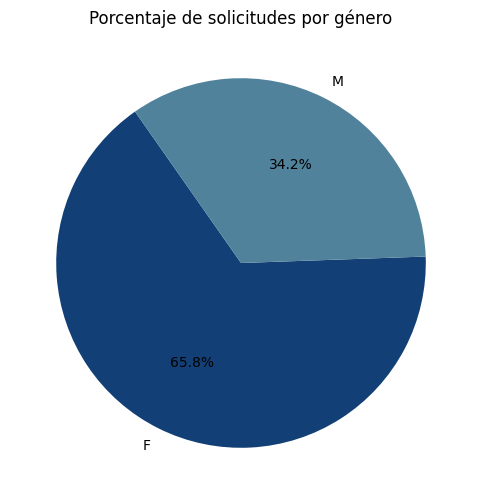

In [82]:
plt.figure(figsize=(6, 6))

plt.pie(gender.values, labels=gender.index, autopct='%1.1f%%', startangle=125, colors=['#124076', '#51829B'])

plt.title('Porcentaje de solicitudes por género')

plt.show()

> *Podemos ver que la mayor parte de los clientes, precisamente el 65.8% son de sexo femenino, mientras que el 34.2% son de sexo masculino.*

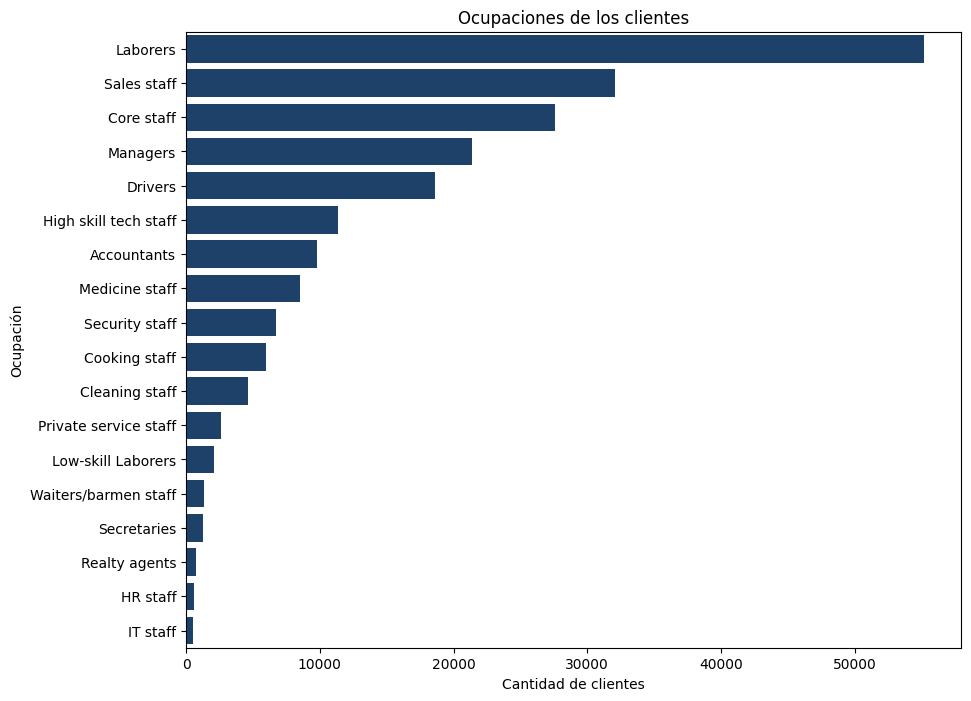

In [79]:
plt.figure(figsize=(10, 8))

sns.countplot(data=df, y='OCCUPATION_TYPE', order= df['OCCUPATION_TYPE'].value_counts().index, color='#124076')

plt.title('Ocupaciones de los clientes')

plt.xlabel('Cantidad de clientes')
plt.ylabel('Ocupación')

plt.show()